### Results analyses
##### SRM package

In [1]:
import numpy as np
import pandas as pd
from StatsModel.cov_corr_funcs import *

import matplotlib.pyplot as plt
import sys

# Add custom path
sys.path.insert(0, '/Users/DuoL/Documents/PythonPath')

# Option A: Use style file
plt.style.use('/Users/DuoL/Documents/PythonPath/custom_plot_style.mplstyle')


In [23]:
# df must contain columns: 'SHmax_deg' (0–180°), 's2ratio', 'xnuc'

# cov_aug = covariance_with_cos_rake(ssTable1, rake_col="rake",extra_cols=["Ts0","Td0","PSR","ASl"])

# cov_lin = covariance_naive_linear(ssTable1, "rake", "rake", "ASl")

# strength = circular_strength_axial(ssTable1["SHmax"])

# summary = summarize_interdependency(ssTable1, "SHmax", "rake", "ASl")

# display(cov_aug)     # circular-aware covariance (recommended)
# display(cov_lin)     # naïve reference
# print(strength)      # {'R_double_angle': ..., 'circular_variance_axial': ...}
# display(summary)     # quick association summary


In [557]:
# modelname='jp3w'

# modelname='jp3xSF2'
# modelname='jp3zBcEL'
# modelname='c9-s40r45F'
# modelname= 'c9s50n27A'
# modelname='welF400tap'

modelname='jp4bD' # wai+slab
# modelname='jp3yF' # wai only
# modelname='jp6a'

add_xyz=True

ssTable1 = pd.read_csv('/Users/DuoL/Documents/NSHM/Central/cov/slab3v/stress_'+modelname+'_final.csv')
ssTable0 = pd.read_csv('/Users/DuoL/Documents/NSHM/Central/cov/slab3v/stress_'+modelname+'_t0.csv')

print(ssTable1['PSR'].max())

ssTable1['sdrop'] = np.sqrt(ssTable0['Td0']**2+ ssTable0['Ts0']**2) - np.sqrt(ssTable1['Td0']**2+ ssTable1['Ts0']**2) 

ssTable1['T0']= np.sqrt(ssTable0['Td0']**2+ ssTable0['Ts0']**2) 
ssTable1['Pf'] = np.abs(ssTable0['Pn0'])

ssTable1['r'] = ssTable1['T0']/ssTable1['Pf']

ssTable1['Sdir'] = np.arcsin(ssTable0['Td0']/ssTable1['T0'])/np.pi*180 # in degree

xdmf_folder = '/Volumes/heiterwange/NSHM/Hikurangi/FaultOutput/'

if add_xyz:
    importlib.reload(StatsModel.cov_corr_funcs)
    from StatsModel.cov_corr_funcs import add_coordinates_from_xdmf

    ssTable1 =add_coordinates_from_xdmf(ssTable1,xdmf_folder + modelname +'-fault.xdmf')

32.938
ADDING COORDINATES FROM XDMF

Loading XDMF file: /Volumes/heiterwange/NSHM/Hikurangi/FaultOutput/jp4bD-fault.xdmf
  Reading geometry (vertices)...
  Reading connectivity (elements)...

XDMF data:
  Vertices: 231507
  Elements: 77169
  Vertices per element: 3

Computing element positions using method='centroid'...
  Processed 50000/77169 elements...

Coordinate ranges:
  x: [1690230.92, 1891209.46]
  y: [5328379.67, 5506686.67]
  z: [-29941.59, -56.18]

✓ Added coordinates to DataFrame
  New columns: ['x', 'y', 'z']



In [558]:
print(ssTable1.keys())

# filter data according to final slip
ssTable2 = ssTable1[ssTable1['ASl'].between(0.5,100,inclusive='both')]

# Filter Vr to maximum 8000 m/s
ssTable2 = ssTable2[ssTable2['Vr'] <= 10000]

print(ssTable1.__len__(),ssTable2.__len__(),ssTable2.keys())

Index(['TimeStep', 'fault-tag', 'SRs', 'SRd', 'Ts0', 'Td0', 'Pn0', 'Sls',
       'Sld', 'Vr', 'ASl', 'PSR', 'RT', 'rake', 'Area', 'Cell Type', 'sdrop',
       'T0', 'Pf', 'r', 'Sdir', 'x', 'y', 'z'],
      dtype='object')
77169 75165 Index(['TimeStep', 'fault-tag', 'SRs', 'SRd', 'Ts0', 'Td0', 'Pn0', 'Sls',
       'Sld', 'Vr', 'ASl', 'PSR', 'RT', 'rake', 'Area', 'Cell Type', 'sdrop',
       'T0', 'Pf', 'r', 'Sdir', 'x', 'y', 'z'],
      dtype='object')


In [410]:
# select the target table
# crustal models
# ssTable_all = pd.read_csv('statsTable/stats-crust-mean.csv')

# tag_list = ssTable_all['fault-tag'].to_list()
# model_list = [itag.split('_')[0] for itag in tag_list]

# model_list_crt = np.unique(model_list)

# # slab models
# ssTable_all = pd.read_csv('statsTable/stats-slab2m0-mean.csv')

# tag_list = ssTable_all['fault-tag'].to_list()
# model_list = [itag.split('_')[0] for itag in tag_list]

# model_list_hik = np.unique(model_list)

# print(model_list_crt,model_list_hik)

# 2rd dataset of selected 

df_mw_crt=pd.read_csv('statsTable/df_mw_crt.csv')
df_mw_hik=pd.read_csv('statsTable/df_mw_hik.csv')

model_list_crt = df_mw_crt['model'].to_list()
model_list_hik = df_mw_hik['model'].to_list()

print(model_list_crt,model_list_hik)

# print(df_mw_hik)

# separate crustal and slab segment data

# from StatsModel.prepare_fault_data import prepare_fault_hik_crust_data
# slipm0_hik, slipm0_crt,df_slipm0_hik,df_slipm0_crt = prepare_fault_hik_crust_data(model_list_crt,model_list_hik)


['c9-s40r45E', 'c9-s40r45F', 'c9-s40r45G', 'c9-s40r45H', 'c9s15n27A', 'c9s20n27A', 'c9s35n27b', 'c9s40n26A', 'c9s40n26B', 'c9s40n27A', 'c9s40n27B', 'c9s50n27A', 'jp3yB', 'jp3yD', 'jp3yF'] ['jp3xSF2', 'jp3xSF6', 'jp3yC', 'jp3yE', 'jp3z', 'jp3zB', 'jp3zC', 'jp3zD', 'jp3zE', 'jp3zF', 'jp3zG', 'jp4bC', 'jp4bD', 'jp4bF', 'jp4bFsurf', 'jp4bG', 'jp4bH', 'jp4bH_att', 'jp4d', 'jp4e', 'jp4eAtt', 'jp4f', 'jp4g']


In [ ]:
#!!!  Prepare fault moment table for all models.

import StatsModel.prepare_fault_data
importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import prepare_fault_moment_data

model ='crustal' # input file location
outdir = 'crustalM0'
xdmffolder = '/Volumes/heiterwange/NSHM/Hikurangi/crustal'


# either it slab events or crustal events
prepare_fault_moment_data(model=model,model_list=model_list,variable_list=variable_list,outdir=outdir, xdmffilefolder=xdmffolder)




In [ ]:
print(ssTable1['ASl'].median(),ssTable1['ASl'].mean(),ssTable1['ASl'].max(),ssTable1['ASl'].min())
print()

0.51389 3.565061963695494 16.729 -0.18365


In [ ]:
# combine slab and crustal together
# Initialize lists for collecting data


In [ ]:
# print(df_slipm0_crt.keys())
# print(df_slipm0_hik.keys())

Index(['model', 'fault-tag', 'mean_slip', 'Mw', 'total_M0', 'count'], dtype='object')
Index(['model', 'fault-tag', 'mean_slip', 'Mw', 'total_M0', 'count'], dtype='object')


In [490]:
importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import process_models_timing

# Process all Hikurangi models
model_list_hik_example = ['jp3z', 'jp3xSF2', 'jp3y']

df_all_timing_hik = process_models_timing(
    model_list_hik,
    data_folder='/Users/DuoL/Documents/NSHM/Central/cov/slab3v/',
    material_file='/Users/DuoL/Documents/NSHM/Central/cov/resample_mat.csv',
    xdmf_folder='/Volumes/heiterwange/NSHM/Hikurangi/FaultOutput/',
    add_xyz=True,
)

print(df_all_timing_hik.__len__())

df_all_timing_hik.to_csv('onset_dur_m0_hik.csv')

# Visualize
# fig, axes = plot_segment_timing(df_all_timing, save_path='timing_analysis.png')
# plt.show()


PROCESSING MULTIPLE MODELS - TIMING AND MOMENT ANALYSIS

Models to process: 23
Data folder: /Users/DuoL/Documents/NSHM/Central/cov/slab3v/
File pattern: stress_<model>_final.csv
Material file: /Users/DuoL/Documents/NSHM/Central/cov/resample_mat.csv
XDMF folder: /Volumes/heiterwange/NSHM/Hikurangi/FaultOutput/


[1/23] Processing model: jp3xSF2
----------------------------------------------------------------------
✓ Loaded: /Users/DuoL/Documents/NSHM/Central/cov/slab3v//stress_jp3xSF2_final.csv
  Rows: 101421
  Adding coordinates from XDMF...
ADDING COORDINATES FROM XDMF

Loading XDMF file: /Volumes/heiterwange/NSHM/Hikurangi/FaultOutput//jp3xSF2-fault.xdmf
  Reading geometry (vertices)...
  Reading connectivity (elements)...

XDMF data:
  Vertices: 304263
  Elements: 101421
  Vertices per element: 3

Computing element positions using method='centroid'...
  Processed 50000/101421 elements...
  Processed 100000/101421 elements...

Coordinate ranges:
  x: [1690230.92, 1891209.46]
  y: [5

Traceback (most recent call last):
  File "/Users/DuoL/Documents/PythonPath/StatsModel/prepare_fault_data.py", line 672, in process_models_timing
    df_timing = calculate_segment_timing(
                ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/DuoL/Documents/PythonPath/StatsModel/prepare_fault_data.py", line 454, in calculate_segment_timing
    raise ValueError(f"Missing required columns: {missing}")
ValueError: Missing required columns: ['fault-tag']



XDMF data:
  Vertices: 231543
  Elements: 77181
  Vertices per element: 3

Computing element positions using method='centroid'...
  Processed 50000/77181 elements...

Coordinate ranges:
  x: [1690230.92, 1891209.46]
  y: [5328379.67, 5506686.67]
  z: [-29941.59, -56.18]

✓ Added coordinates to DataFrame
  New columns: ['x', 'y', 'z']

  ✓ Coordinates added

CALCULATING SEGMENT TIMING AND MOMENT

Fault data: 77181 elements
RT range (all): [0.000, 79.997] s
Number of segments: 4

Filtering RT > 0.0 (ruptured elements only):
  Total elements: 77181
  Ruptured (RT > 0): 51777 (67.1%)
  Not ruptured (RT = 0): 25404 (32.9%)
RT range (ruptured): [0.356, 79.997] s

----------------------------------------------------------------------
Calculating seismic moment...
----------------------------------------------------------------------
Filtering by ASl (0.5 < ASl < 100 m):
  Elements before filter: 77181
  Elements after filter: 47295 (61.3%)
SEISMIC MOMENT CALCULATION

Loading material propert

Index(['fault-tag', 'count', 'total_M0', 'mean_mu', 'std_mu', 'total_slip',
       'mean_slip', 'total_area', 'mean_area', 'Mw', 'mean_M0_per_element'],
      dtype='object') Index(['model', 'fault-tag', 'count', 'RT_start', 'RT_end', 'duration', 'Mw',
       'mean_slip', 'total_M0', 'total_area'],
      dtype='object')

PLOTTING HISTOGRAM: total_area

⚠ Removed 3 NaN values (7.7%)
Plotting 36 values
Range: [2.73e+06, 2.43e+09]
Mean: 4.44e+08
Median: 2.84e+08

✓ Saved figure to: area-crt-histogram.png

✓ Histogram plot created successfully


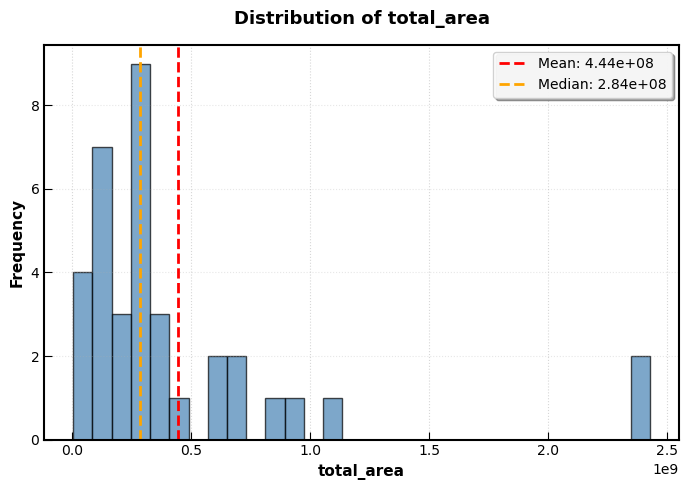

In [ ]:
# importlib.reload(StatsModel.prepare_fault_data)
# from StatsModel.prepare_fault_data import plot_variable_histogram

# df_all_timing_hik=pd.read_csv('statsTable/onset_dur_m0_hik.csv')
print(df_moment.keys(),df_all_timing_hik.keys())

# print(df_all_timing_hik[df_all_timing_hik['Mw'].between(0,5.6)])


# Plot duration histogram
# fig, ax = plot_variable_histogram(
#     df_all_timing_crt,
#     variable='total_area',
#     bins=30,
#     save_path='area-crt-histogram.png',
# )

# plt.show()


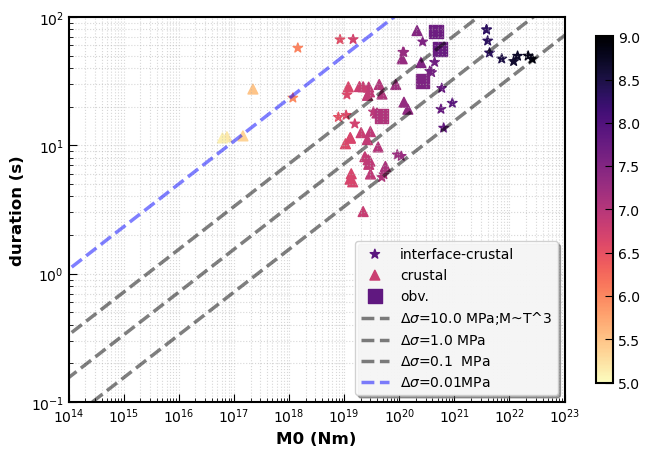

In [539]:
# print(df_all_timing.head())

add_obv = True

obv_mod= ['2016 Mw7.8 Kaikoura','2023 M7.8 Turkey','2023 M7.4 Turkey','2025 M7.7 Myanmar','2024 M7.1 South Tibet']
obv_m0 = np.array([7.040e+20, 5.389e+20 ,2.637e+20,4.634e+20 ,4.749e+19])
obv_dur= [58*2, 28*2, 15.75 *2, 38.5*2, 8.5*2]


df_all_timing_hik_fil=df_all_timing_hik[df_all_timing_hik['Mw'].between(5.5,9.0)]

fig,axe=plt.subplots(1,1,figsize=(8,5))

im3 = axe.scatter(df_all_timing_hik_fil['total_M0'],df_all_timing_hik_fil['duration'],marker='*',s=50,c=df_all_timing_hik_fil['Mw'],cmap='magma_r',
                  vmax=9,vmin=5.0,label='interface-crustal')
axe.scatter(df_all_timing_crt['total_M0'],df_all_timing_crt['duration'],marker='^',s=50,
            c=df_all_timing_crt['Mw'],vmax=9,vmin=5.0,cmap='magma_r',label='crustal')

if add_obv:
    # obv. list
    axe.scatter(obv_m0,obv_dur,marker='s',s=100,c= 2.0/3.0*np.log10(obv_m0)-6.07,cmap='magma_r',label='obv.',vmax=9,vmin=5.0,)


tarr = np.arange(0.1,200,10)

mu=40e9

v0=3000.0

sdrop= 10e6

m0arr = tarr**3 * v0**3 *sdrop
axe.plot(m0arr,tarr, '--',c='k',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6} MPa;M~T^3')

sdrop= 1e6
m0arr = tarr**3 * v0**3*sdrop
axe.plot(m0arr,tarr, '--',c='k',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6} MPa')

sdrop= 0.1e6
m0arr = tarr**3 * v0**3*sdrop
axe.plot(m0arr,tarr, '--',c='k',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6}  MPa')

v0=2000.0

sdrop= 0.01e6
m0arr = tarr**3 * v0**3*sdrop
axe.plot(m0arr,tarr, '--',c='b',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6}MPa')


clb=plt.colorbar(im3,ax=axe,shrink=0.9)

axe.set_xscale('log')
axe.set_yscale('log')
axe.set_ylim([0.1,100])
axe.set_xlim([1e14,1e23])
axe.set_xlabel('M0 (Nm)')
axe.set_ylabel('duration (s)')
plt.legend()

plt.show()


PLOTTING HISTOGRAM: mean_slip

Plotting 32 values
Range: [0.589, 41.1]
Mean: 8.36
Median: 6.11

Grouping by 'fault-tag': 4 groups
  Aotea: n=9, mean=6.28, median=5.28
  Wellington: n=7, mean=4.3, median=2.53
  Whitemans: n=7, mean=3.07, median=1.96
  Hikurangi: n=9, mean=17.7, median=11.3

✓ Saved figure to: slip_by_segment.png

✓ Histogram plot created successfully


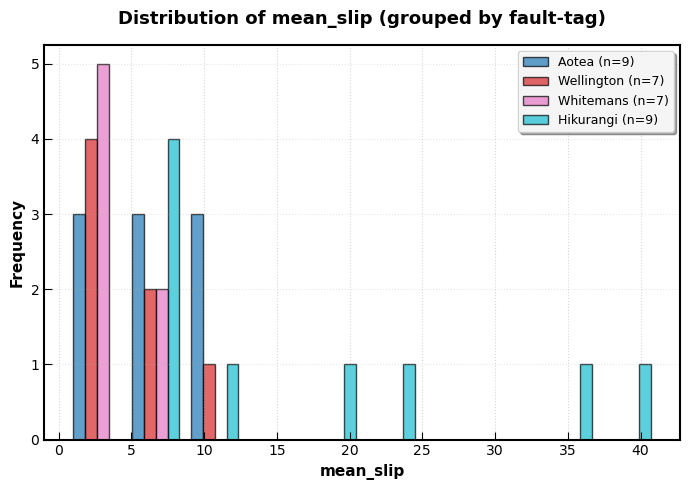

In [569]:
# Plot histogram

# df_all = pd.concat([df_all_timing_crt])

# fig,axe1 = plot_histogram_circular(df_all,col='duration')

# plt.savefig('dist-all-T.png',dpi=300)

# fig,axe1 = plot_histogram_circular(ssTable2,col='rake',color='violet',bins=36,figsize=(5,5),title='')

# plt.show()

importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import plot_variable_histogram

fault_labels = {
    68: 'Hikurangi',
    3: 'Aotea',
    65: 'Wellington',
    66: 'Whitemans',
}

# Plot mean_slip histogram, grouped by fault segment
fig, ax = plot_variable_histogram(
    df_all_timing_hik_fil,
    variable='mean_slip',
    group_by='fault-tag',
    group_labels=fault_labels,
    bins=10,
    save_path='slip_by_segment.png'
)
plt.show()


# fig,axe1 = plot_histogram_circular(ssTable2,col='Sdir',color='royalblue',bins=36,figsize=(5,5),title='')

# plt.show()

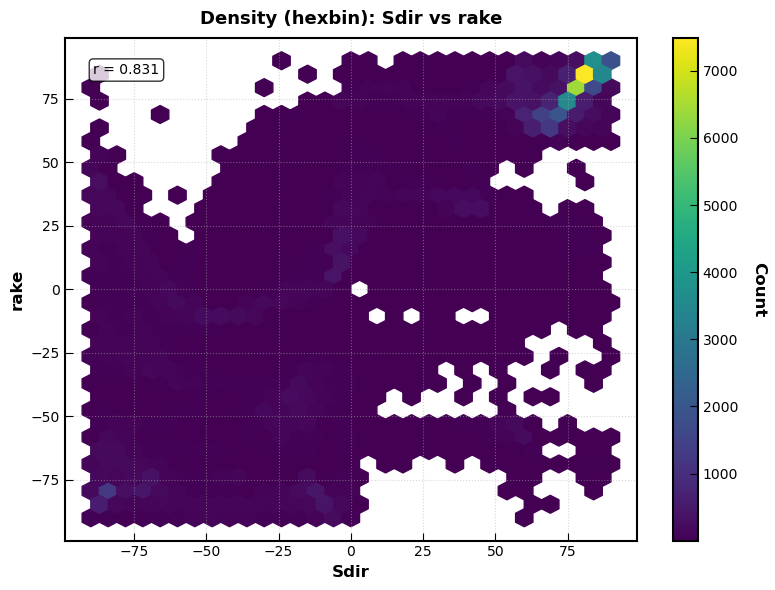

In [573]:


fig,axe1 = plot_density_hexbin(ssTable2,x_col='Sdir',y_col='rake')


plt.savefig('Sdir-rake-'+modelname+'.png')




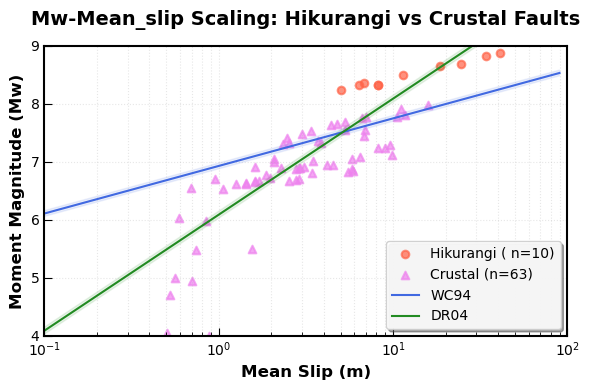

In [ ]:
# plot all data togeter

import StatsModel.plot_bias_sigma
importlib.reload(StatsModel.plot_model_scale)
from StatsModel.plot_model_scale import plot_model_scaling

fig,axe = plot_model_scaling(df_slipm0_hik,df_slipm0_crt)

plt.show()

### Moment rate plot

[skip] Failed to read ._c9-s40r45F-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9-s40r45G-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s15n27A-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s20n27A-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s35n27b-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s40n26A-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._jp3yD-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._jp3yF-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
c9-s40r45E: Mw 7.36
c9-s40r45F: Mw 7.10
c9-s40r45G: Mw 7.05
c9

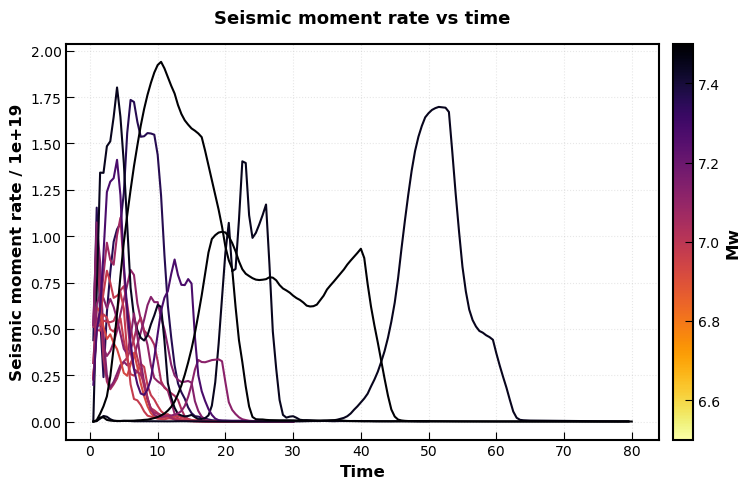

In [395]:
importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import plot_all_moment_rates_colored

# Example: all CSVs like /path/to/Joint4/energy/<model>-energy.csv
df_mw_crt,fig, axe = plot_all_moment_rates_colored("/Volumes/heiterwange/NSHM/Hikurangi/STFs/crustal/",
                               pattern="*-energy.csv",
                               scale_rate=1e19,
                               cmap_name='inferno_r',
                               savepath="STF_crt_all.png",
                               mw_range=[6.5,7.5],
                               show=True)





In [396]:
df_mw_hik.to_csv('df_mw_hik.csv')
df_mw_crt.to_csv('df_mw_crt.csv')

## Load data and ploe the scaling for different model setups: crustal, Joint3 and Joint4

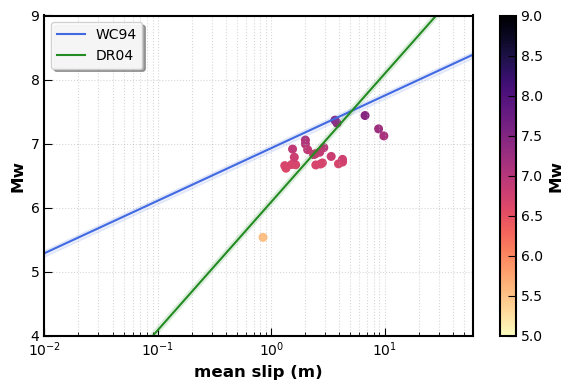

In [ ]:
# print(df_moment.keys())


fig,axe = plt.subplots(1,1,figsize=(6,4))

for imod, modelname in enumerate(model_list):

    try:
        df_moment=pd.read_csv('statsTable/'+ outdir +'/statsM0-'+modelname+'.csv')

        im3 = axe.scatter((df_moment['mean_slip']),df_moment['Mw'],c=df_moment['Mw'],s=30,cmap='magma_r',vmax=9,vmin=6)
    except:
        pass

u_avg = np.arange(0.01,60,2)

a,a_std,b,b_std = 6.93 ,0.05, 0.82,0.0

axe.plot((u_avg),a + b*np.log10(u_avg),color='royalblue',linestyle='-',linewidth = 1.5,label=f'WC94')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='royalblue')

# Mw={a} + {b}*1og(u_mean) 
a,a_std,b,b_std = 6.09,0.06, 2,0.0

axe.plot((u_avg),a + b*np.log10(u_avg),color='forestgreen',linestyle='-',linewidth = 1.5,label=f'DR04')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='forestgreen')


# scaling from Stirling (2024) NSHM

# a,a_std,b,b_std = 4.3,0.0,1,0.0

# axe.plot((u_avg),a-a_std+b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5,label=f'SEA24:strike)')
# axe.plot((u_avg),a+a_std+b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5)
# axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
#                  color='tomato')

# a,a_std,b,b_std = 3.6,0.0,1,0.0

# axe.plot((u_avg),a+a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5,label=f'(SEA24:interface)')
# axe.plot((u_avg),a-a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5)
# axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
#                  color='tomato')


axe.set_xscale('log')
axe.set_xlabel('mean slip (m)')
axe.set_ylabel('Mw')
axe.set_xlim([0.01,60])
axe.set_ylim([4,9])
axe.legend()
clb = plt.colorbar(im3,ax=axe)
clb.set_label('Mw')

plt.tight_layout()

plt.savefig('covfigures/'+'MwSlip-scaling-'+outdir + '.png')

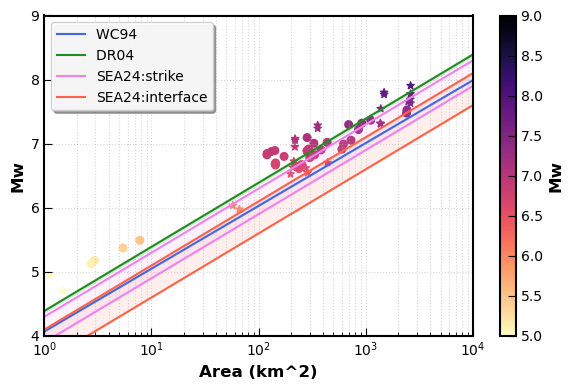

In [ ]:
# scaling between Mw and log(A) 

fig,axe = plt.subplots(1,1,figsize=(6,4))

# for imod, modelname in enumerate(model_list):

#     try:
#         df_moment=pd.read_csv('statsTable/'+ outdir + '/'+'statsM0-'+modelname+'.csv')

#         im3 = axe.scatter((df_moment['total_area'])/1e6,df_moment['Mw'],c=df_moment['Mw'],s=30,cmap='magma_r',vmax=9,vmin=5)
#     except:
#         pass

im3 = axe.scatter((df_all_timing_crt['total_area'])/1e6,df_all_timing_crt['Mw'],c=df_all_timing_crt['Mw'],s=30,cmap='magma_r',vmax=9,vmin=5)
axe.scatter((df_all_timing_hik['total_area'])/1e6,df_all_timing_hik['Mw'],marker='*',c=df_all_timing_hik['Mw'],s=50,cmap='magma_r',vmax=9,vmin=5)

u_avg = np.arange(1,10000,100)


# Mw=4.07 + 0.98*1og(A)   Donald L. Wells and Kevin J. Coppersmith
a,a_std,b,b_std = 4.07,0,0.98,0.0
axe.plot((u_avg),4.07 + 0.98*np.log10(u_avg),color='royalblue',linestyle='-',linewidth = 1.5,label='WC94 ')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='royalblue')


# Mw=4.39 + 1.0*1og(A)  D. J. Dowrick and D. A. Rhoades
a,a_std,b, b_std = 4.39, 0.03, 1.0 ,0.0
axe.plot((u_avg),a + b*np.log10(u_avg),color='forestgreen',linestyle='-',linewidth = 1.5,label='DR04 ')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='forestgreen')


# Stirling et al. 2024.
# strike slip
a,a_std,b,b_std = (4.3+3.9)/2, (4.3-3.9)/2,1,0.0

axe.plot((u_avg),a-a_std+b* np.log10(u_avg),color='violet',linestyle='-',linewidth = 1.5,label=f'SEA24:strike')
axe.plot((u_avg),a+a_std+b* np.log10(u_avg),color='violet',linestyle='-',linewidth = 1.5)
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='violet')

# slab interface
a,a_std,b,b_std = (4.1+3.6)/2, (4.1-3.6)/2,1,0.0

axe.plot((u_avg),a+a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5,label=f'SEA24:interface')
axe.plot((u_avg),a-a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5)
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='tomato')

# axe.plot((u_avg),3.78+1.33* np.log10(100*u_avg),color='tomato',linestyle='--',linewidth = 1.5,label='Mw=3.78+1.33*1og(u_mean) (VET24) ')


axe.set_xscale('log')
axe.set_xlabel('Area (km^2)')
axe.set_ylabel('Mw')
axe.set_xlim([1,10000])
axe.set_ylim([4,9])
axe.legend()
clb = plt.colorbar(im3,ax=axe)
clb.set_label('Mw')

plt.tight_layout()

plt.savefig('covfigures/'+'MwArea-scaling-all-'+outdir+'.png')

In [ ]:
# scalng for

### energy proxy

In [128]:
# seperate eneryg based on fault-tag
import importlib, StatsModel.combine_cov_data
from StatsModel.combine_cov_data import group_by_fault_tag,group_by_fault_tag_multi_stats


variable_list = ['rake','ASl','Vr','PSR','T0','r']

# df_grouped = group_by_fault_tag(
#     ssTable2,
#     variable_list=variable_list,
#     agg_func='mean',
# )

# More comprehensive statistics
df_stats = group_by_fault_tag_multi_stats(
    ssTable2,
    variable_list=variable_list,
    stats=['mean', 'std', 'min', 'max', 'median', 'count']
)



MULTI-STATISTIC GROUPING SUMMARY
Grouped by: fault-tag
Number of groups: 3
Variables: ['rake', 'ASl', 'Vr', 'PSR', 'T0', 'r']
Statistics: ['mean', 'std', 'min', 'max', 'median', 'count']



In [ ]:
ssTable3= ssTable2[ssTable2['fault-tag'].isin([3])]
print(ssTable3['PSR'].min(),ssTable3['PSR'].max())
print(df_stats.keys())

In [ ]:
# plot  magnitude slip scaling for a single model
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import (calculate_seismic_moment_by_fault,
                                       plot_seismic_moment_summary)

# Calculate seismic moment by fault segment
df_moment = calculate_seismic_moment_by_fault(
    fault_data=ssTable2,
    material_file='/Users/DuoL/Documents/NSHM/Central/cov/resample_mat.csv'
)

# Display results
print(df_moment)

# Plot summary
fig, axes = plot_seismic_moment_summary(df_moment,
                                        save_path='covfigures/'+ 'moment_summary.png')

axes[0,0].set_xticklabels(['Hik','Wai','Wel','Aot'])
axes[0,1].set_xticklabels(['Hik','Wai','Wel','Aot'])

plt.savefig('covfigures/'+ 'moment_summary.png',dpi=300)
# plt.show()

# Save results

df_moment.to_csv('statsTable/'+ 'moment_by_fault.csv', index=False)

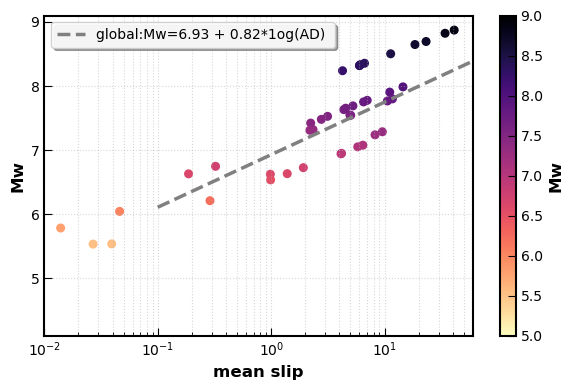

In [ ]:
import importlib, StatsModel.combine_cov_data
importlib.reload(StatsModel.combine_cov_data)
from StatsModel.combine_cov_data import plot_grouped_stats

df_stats.to_csv('statsTable/'+'stats-fault-'+modelname+'.csv')
# print(df_stats.keys())


# With error bars from multi-stats
# df_stats = group_by_fault_tag_multi_stats(ssTable1, ['rake', 'ASl', 'Vr'])
fig, axes = plot_grouped_stats(df_stats, stats_to_plot=['mean'], plot_type='bar',groupby_column='fault-tag',
                                show_errorbar=True,variables=variable_list,pregroup_by_segtag=False)

plt.savefig('covfigures/'+'grouped-'+modelname +'.png')

In [441]:
print(ssTable_all.__len__())

60


### correlation relation

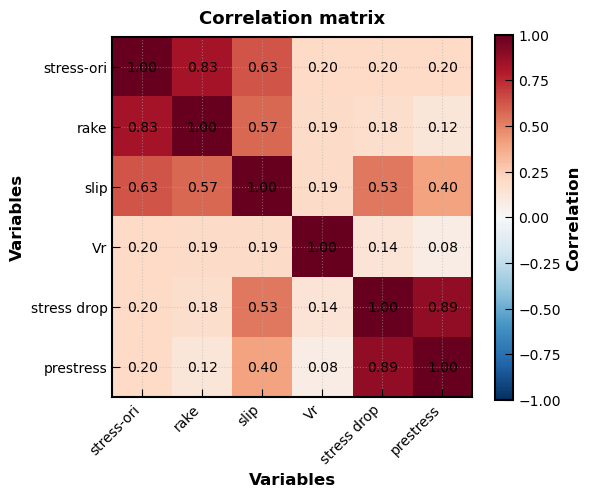

In [571]:
# calcualte the covariance and correlaton matrix from simulation results

import importlib
import StatsModel.cov_corr_funcs
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_corr_heatmap,covariance_with_cos_rake,cov_to_corr

# ssTable_all=pd.read_csv('statsTable/stats-crust-mean.csv')
# ssTable_all=pd.read_csv('statsTable/stats-slab2m0-mean.csv')

modelname = 'jp4bD'

cov_aug = covariance_with_cos_rake(ssTable2, rake_col="Sdir",extra_cols=['rake','ASl','Vr','sdrop','r'])

df = cov_to_corr(cov_aug)

plot_corr_heatmap(df,labels=['stress-ori','rake','slip','Vr',
                             'stress drop','prestress'])

plt.savefig('covfigures/'+'cor-'+modelname+'.png')

In [448]:
print(ssTable_all.keys(),ssTable_all.__len__())

Index(['Unnamed: 0', 'fault-tag', 'count', 'Td0', 'ASl', 'Vr', 'rake', 'Ts0',
       'Pn0', 'Sls', 'Sld', 'seg-tag', 'sdrop', 'T0', 'Pf', 'r'],
      dtype='object') 60


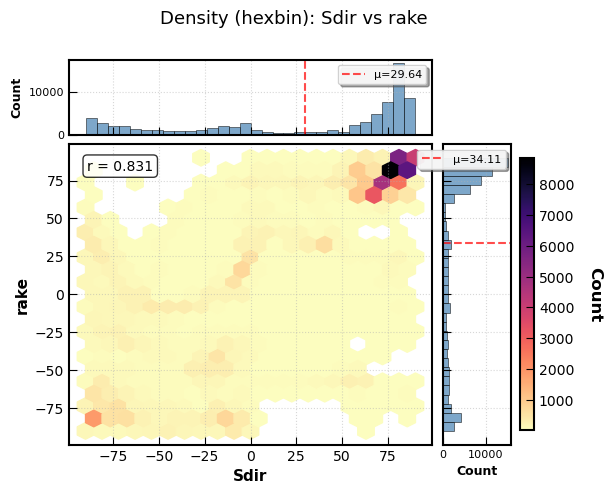

In [600]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_density_hexbin,plot_density_2d

# fig, axe = plot_density_2d(ssTable2,x_col='r',y_col='ASl',bins=50,figsize=(6,5),
#                           scatter_size=2,scatter_alpha=0.2)

# ssTable_all = pd.read_csv('statsTable/stats-slab3v-mean-sdir.csv')

# ptitle='prestress~slip' 
ptitle='rake~slip'
ptitle='stress~rake'
# ptitle='prestress~Vr'

if ptitle=='prestress~slip':

    fig, axe = plot_density_hexbin(ssTable2,x_col='r',y_col='ASl',gridsize=30,figsize=(6,5),cmap='magma_r')

    xlabel1='prestress ratio'
    ylabel1='fault slip (m)'

if ptitle=='stress~rake':

    fig, axe = plot_density_hexbin(ssTable2,x_col='Sdir',y_col='rake',gridsize=20,figsize=(6,5),cmap='magma_r')

    xlabel1='initial stress ratio'
    ylabel1='rake'

elif ptitle=='rake~slip':

    fig, axe = plot_density_hexbin(ssTable2,x_col='rake',y_col='ASl',gridsize=10,figsize=(6,5),cmap='magma_r')

    xlabel1='rake (degree)'
    ylabel1='fault slip (m)'
else:
    fig, axe = plot_density_hexbin(ssTable2,x_col='r',y_col='Vr',gridsize=300,figsize=(6,5),cmap='magma_r')

    xlabel1='prestress ratio'
    ylabel1='rupture velocity (m/s)'   
    axe.set_ylim([0,18000])


# axe.set_title(ptitle)

# axe.set_ylabel(ylabel1)
# axe.set_xlabel(xlabel1)

plt.savefig('covfigures/'+'hist2d-'+ modelname+ '-'+ ptitle + '.png')
plt.show()


In [ ]:
# 1D histogram
import StatsModel.cov_corr_funcs

importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_histogram_circular

normal_direct=True

if normal_direct:
    ssTable1['rake']=-ssTable1['rake']

fig, axe = plot_histogram_circular(ssTable1,col='rake',figsize=(5,5))

plt.savefig('covfigures/'+'rose-rake-'+ modelname + '.png',dpi=300)
plt.show()

In [443]:
print(ssTable_all.__len__(),ssTable_all.keys())

60 Index(['Unnamed: 0', 'fault-tag', 'count', 'Td0', 'ASl', 'Vr', 'rake', 'Ts0',
       'Pn0', 'Sls', 'Sld', 'seg-tag', 'sdrop', 'T0', 'Pf', 'r'],
      dtype='object')


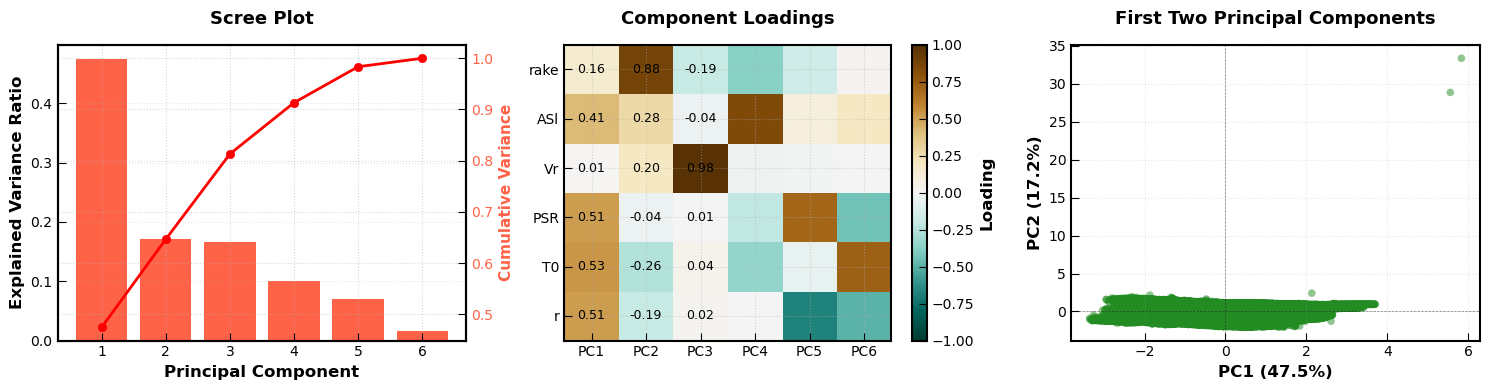

In [ ]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_pca_analysis

# Convert to dict with numpy arrays
data_dict = {col: ssTable_all[col].values for col in ssTable2.columns}

variable_list = ['rake','ASl','Vr','PSR','sdrop','r']

fig, axes,pca = plot_pca_analysis(data_dict,variables=variable_list)

plt.savefig('covfigures/'+'pca-' + modelname + '.png')


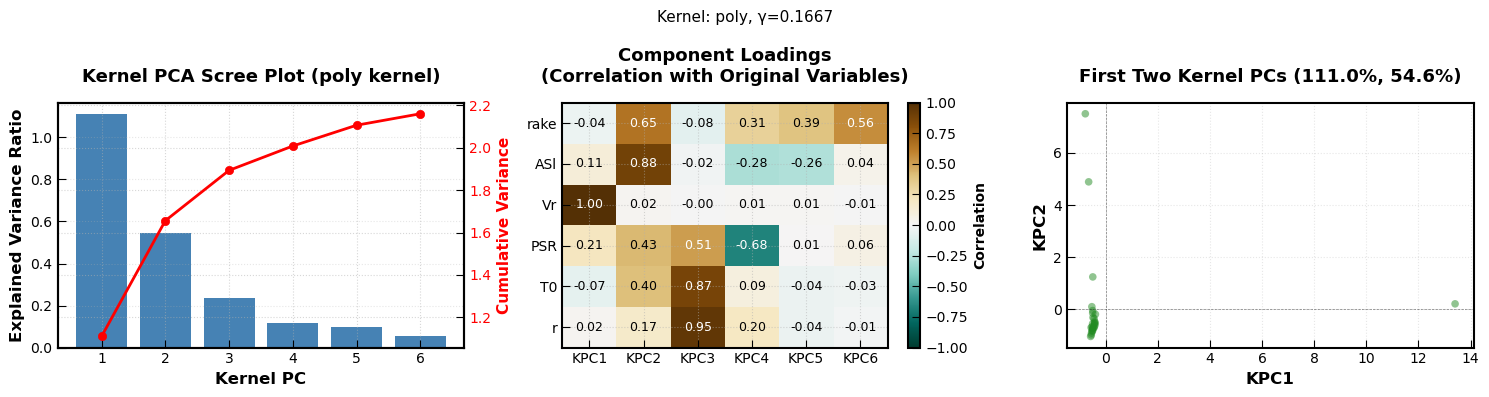

In [ ]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_kernel_pca_analysis

# kernel pca
fig, axes, kpca, X_kpca = plot_kernel_pca_analysis(
    data_dict, 
    variables=variable_list,
    kernel='poly',  # or 'poly', 'sigmoid', etc.
    gamma=None  # auto-calculated if None
)

# Visual comparison
# fig, results = plot_kernel_comparison(data_dict,
#                                       variables=variable_list,
#                                       n_samples=50)


plt.savefig('covfigures/'+'kpcg-'+ 'slab-mean' + '.png')
plt.show()



### PCA for all models



In [451]:
import StatsModel.combine_cov_data
importlib.reload(StatsModel.combine_cov_data)
from StatsModel.combine_cov_data import combine_csv_files, list_appendices_from_folder

# Define your folder and columns
folder_path = "/Users/DuoL/Documents/NSHM/Central/cov/slab3v/"
columns_list = ['fault-tag','Td0', 'ASl', 'Vr', 'rake','Ts0','Pn0','Sls','Sld','RT']

# Option 1: Just list the appendices first
appendices = list_appendices_from_folder(folder_path, prefix='stress_')
print(f"Found models: {appendices}")

# Option 2: Combine all files into one DataFrame
ssTable_all = combine_csv_files(
    folder_path=folder_path,
    columns_list=columns_list,
    prefix='stress_',
    add_source_column=True,  # Adds a 'model' column to track source
    source_column_name='model',
    stress_drop=True,
    group_by_fault=True,
    add_seg_tag=True,
    agg_func='mean',
    include_count=True,
)

print(ssTable_all.head())
print(f"Total rows: {len(ssTable_all)}")
''

Found 21 unique appendices: ['jp3b', 'jp3w', 'jp3wB', 'jp3xSF2', 'jp3xSF6', 'jp3y', 'jp3yC', 'jp3yD', 'jp3yE', 'jp3yF', 'jp3z', 'jp3zBc', 'jp3zBcEL', 'jp3zBcPL', 'jp4b', 'jp4bD', 'jp4bE', 'jp4bF', 'jp4e', 'jp4f', 'jp4g']
Found models: ['jp3b', 'jp3w', 'jp3wB', 'jp3xSF2', 'jp3xSF6', 'jp3y', 'jp3yC', 'jp3yD', 'jp3yE', 'jp3yF', 'jp3z', 'jp3zBc', 'jp3zBcEL', 'jp3zBcPL', 'jp4b', 'jp4bD', 'jp4bE', 'jp4bF', 'jp4e', 'jp4f', 'jp4g']
Found 21 unique appendices: ['jp3b', 'jp3w', 'jp3wB', 'jp3xSF2', 'jp3xSF6', 'jp3y', 'jp3yC', 'jp3yD', 'jp3yE', 'jp3yF', 'jp3z', 'jp3zBc', 'jp3zBcEL', 'jp3zBcPL', 'jp4b', 'jp4bD', 'jp4bE', 'jp4bF', 'jp4e', 'jp4f', 'jp4g']
Loaded 81053 rows from stress_jp3b_final.csv
Loaded 101492 rows from stress_jp3w_final.csv
Loaded 101421 rows from stress_jp3xSF2_final.csv
Loaded 101421 rows from stress_jp3xSF6_final.csv
Loaded 101421 rows from stress_jp3y_final.csv
Loaded 101421 rows from stress_jp3yC_final.csv
Loaded 101421 rows from stress_jp3yD_final.csv
Loaded 101421 rows fro

''

In [588]:
print(ssTable_all.head())
print(f"Total rows: {len(ssTable_all)}")

ssTable_all = pd.read_csv('statsTable/stats-crust-mean.csv')


# ssTable_all['PSR']=np.sqrt(ssTable_all['SRs']**2+ ssTable_all['SRd']**2)
ssTable_all['r']=ssTable_all['T0']/np.abs(ssTable_all['Pf'])


ssTable_all['Sdir']= np.arcsin(ssTable_all['Td0']/ssTable_all['T0'])/np.pi*180.0
ssTable_all = ssTable_all.dropna(subset=['Sdir'])


print(ssTable_all.keys(),ssTable_all.__len__())

ssTable_all.to_csv('statsTable/'+'stats-crust-mean-sdir.csv')


   Unnamed: 0 fault-tag  count           Td0        ASl            Vr  \
0           0    jp3b_3   6439  4.933226e+06  24.011573  4.328743e+03   
1           1   jp3b_65  23673  2.719121e+06  14.200396  3.280655e+03   
2           2   jp3b_66   6191  1.399590e+06   3.079623  7.655731e+02   
3           3   jp3b_68  44750  1.041751e+07  39.608007  4.278291e+03   
4           4    jp3w_3  26905  1.992845e+05  14.518929  4.928601e+12   

        rake           Ts0           Pn0        Sls        Sld         RT  \
0  21.058254 -8.896054e+06 -1.090641e+08 -21.127531   8.849470   8.287651   
1  19.739933 -8.801527e+06 -9.952522e+07 -12.422732   4.784803  18.558924   
2  21.170365 -4.432953e+06 -7.473240e+07  -0.819196   0.633733  33.587199   
3  58.547145  6.377447e+06 -1.511222e+08  17.418129  32.766821  23.954678   
4  -1.613046  3.378846e+06 -6.802735e+07  14.053941   0.005069   5.913428   

   seg-tag         sdrop            T0            Pf         r       Sdir  
0      3.0  1.417577e+

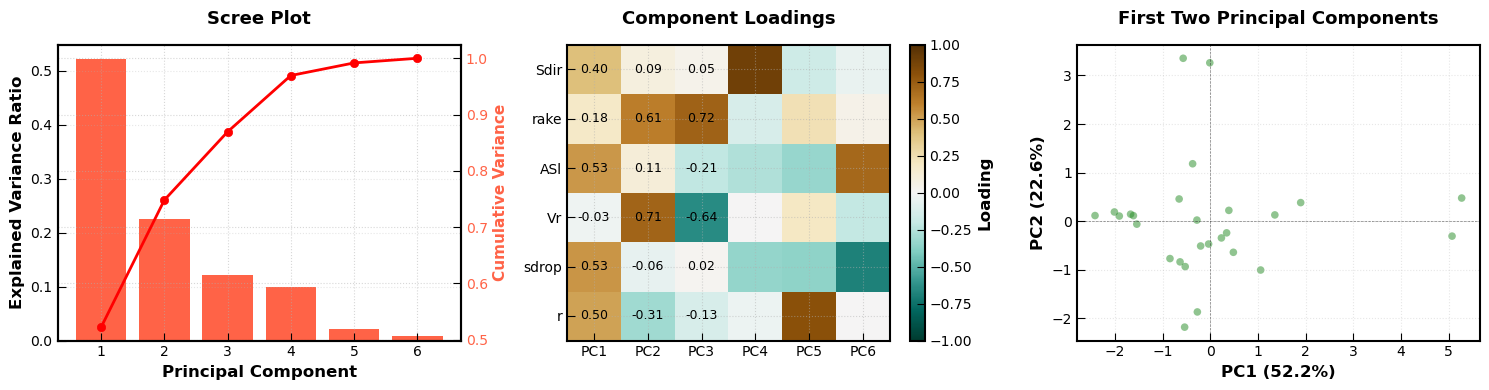

In [589]:
# linear PCA analysis
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_pca_analysis


ssTable_all=pd.read_csv('statsTable/stats-crust-mean-sdir.csv')

var_list = ['Sdir','rake','ASl','Vr','sdrop','r']
# Convert to dict with numpy arrays
data_dict = {col: ssTable_all[col].values for col in ssTable_all.columns}

fig, axes,pca = plot_pca_analysis(data_dict,variables=var_list)

plt.savefig('covfigures/'+'pca-crust-mean.png')


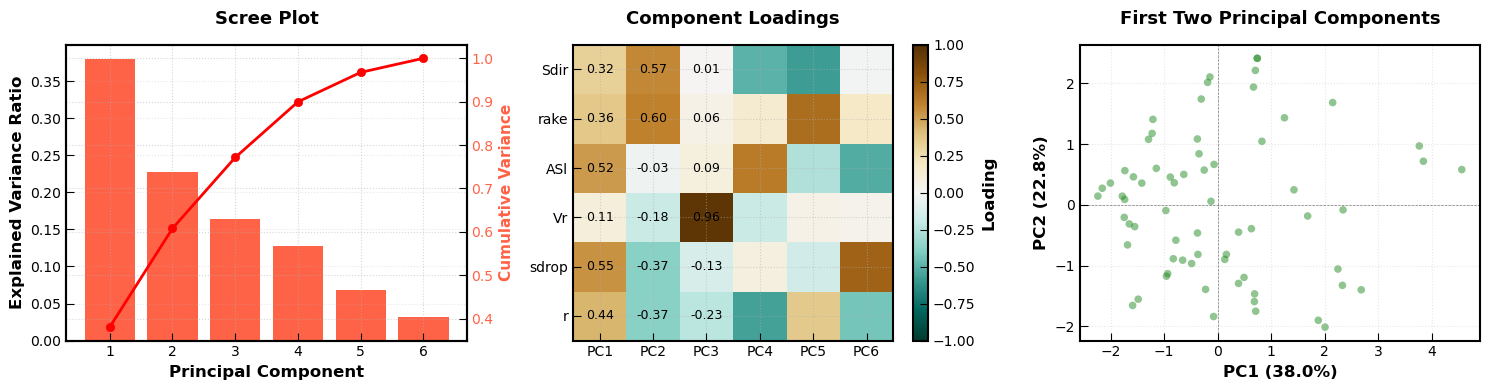

In [586]:
# linear PCA analysis
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_pca_analysis

# ssTable_all=pd.read_csv('statsTable/stats-slab3v-mean.csv')

var_list = ['Sdir','rake','ASl','Vr','sdrop','r']
# Convert to dict with numpy arrays
data_dict = {col: ssTable_all[col].values for col in ssTable_all.columns}

fig, axes,pca = plot_pca_analysis(data_dict,variables=var_list)

plt.savefig('covfigures/'+'pca-slab-mean.png')

In [ ]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_correlation_network

df = cov_to_corr(cov_aug)  # from your cov_to_corr
fig4, axes = plot_correlation_network(df, threshold=0.4)

In [ ]:
# ssTable1.__len__()
import importlib

df_crust=pd.read_csv('jp3_wai_crust.csv')
df_slab=pd.read_csv('jp4_interface.csv')

ele_crust=df_crust['ele']
ele_slab=df_slab['ele']

modelname = 'jp3w'

# xdmfFilename='/Users/DuoL/Documents/NSHM/Central/Joint4/data-jp4bH/jp4bH-fault.xdmf'
xdmfFilename='/Users/DuoL/Documents/NSHM/Central/Joint3/data-jp3w/jp3w-fault.xdmf'

import DyPltFunc.extract_slip_rates
importlib.reload(DyPltFunc.extract_slip_rates)
from DyPltFunc.extract_slip_rates import extract_slip_rates_at_points

time_steps, SRs_arr, SRd_arr = extract_slip_rates_at_points(xdmfFilename, ele_crust)


Number of time steps: 101
Number of points to extract: 164
Time range: 0.000 to 50.000 seconds
Processed 100/101 time steps
Extraction complete!
Times shape: (101,)
SRs data shape: (101, 164)
SRd data shape: (101, 164)


Figure saved to comparison.png


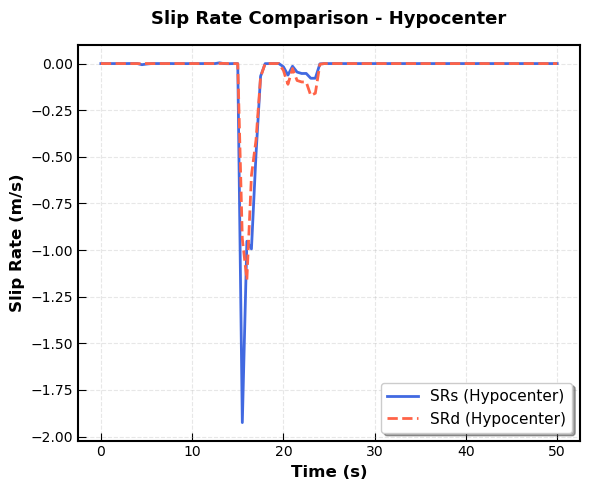

In [ ]:
importlib.reload(DyPltFunc.extract_slip_rates)
from DyPltFunc.extract_slip_rates import plot_slip_rate_comparison

# Compare SRs and SRd at hypocenter
fig, ax = plot_slip_rate_comparison(time_steps, SRs_arr, SRd_arr, 
                                     point_idx=0, 
                                     label='Hypocenter',
                                     save_path='covfigures/'+'comparison.png')

Limiting to first 50 of 164 elements
Figure saved to overlay-jp3w-crust.png


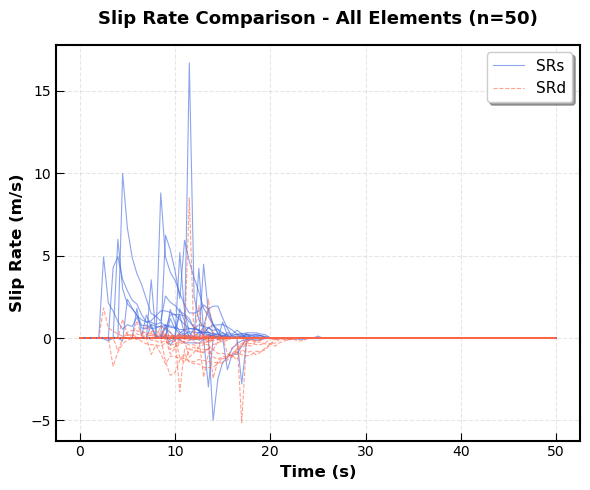

In [ ]:
importlib.reload(DyPltFunc.extract_slip_rates)

from DyPltFunc.extract_slip_rates import plot_slip_rate_comparison_overlay

# Overlay both slip rates on one plot
fig, ax = plot_slip_rate_comparison_overlay(time_steps, SRs_arr, SRd_arr,
                                            max_elements=50,
                                            alpha=0.6,
                                            save_path='covfigures/'+ 'overlay-'+modelname+'-crust.png')

### Curvature 

In [ ]:

# ============================================================================
# Example usage
# ============================================================================
import seissolxdmf

import StatsModel.fault_curvature
importlib.reload(StatsModel.fault_curvature)

from StatsModel.fault_curvature import compute_mesh_curvatures,discrete_mean_curvature
from StatsModel.mesh_func4 import get_curvature_arrays

# Example: Simple mesh (4 vertices forming 2 triangles - a bent plane)

# xdmfFilename = '/Users/DuoL/Documents/NSHM/Central/crustal/welF400tap-fault.xdmf'
# sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
# ndt = sx.ReadNdt()
# vertices = sx.ReadGeometry()
# faces = sx.ReadConnect()

# print(vertices.shape,faces.shape)

faces1=faces[::100,:]

# print("Computing curvatures for example mesh...")
# print(f"Vertices shape: {vertices.shape}")
# print(f"Faces1 shape: {faces1.shape}")


# # # Compute all curvatures
# curvature = compute_mesh_curvatures(vertices, faces1)


# Convert to arrays
H_array, K_array, valid_array = get_curvature_arrays(curvature, len(vertices))
print(f"\nCurvature arrays:")
print(f"H: {H_array}")
print(f"K: {K_array}")
print(f"Valid: {valid_array}")

# kappa_1, kappa_2, dir_1, dir_2 = compute_principal_curvatures(
#         vertices, faces1, "none"
#     )

# # Gaussian curvature
# K = kappa_1 * kappa_2

# # Mean curvature
# H = (kappa_1 + kappa_2) / 2.0


# print("\nResults:")
# print(f"Gaussian curvature (K): {curv['gaussian']}")
# print(f"Mean curvature (H): {curv['mean']}")
# print(f"Shape index (SI): {curv['shape_index']}")
# print(f"Curvedness (C): {curv['curvedness']}")

# # Statistics
# print("\nStatistics:")
# for key in ["gaussian", "mean", "shape_index"]:
#     stats = curvature_statistics(curv[key], key)
#     print(f"{key}: mean={stats['mean']:.6f}, std={stats['std']:.6f}")



Curvature arrays:
H: [171.64452345 130.46679058 181.02008112 ...          nan          nan
          nan]
K: [ 0.  0.  0. ... nan nan nan]
Valid: [ True  True  True ... False False False]
nan nan nan


max and min: 8.282694482977909e-09 -2.9190846910713075e-15 -1.1043592643970543e-08
max and min: 7.52316384526264e-37 9.047111823821444e-40 0.0
max and min: 6.505213034913027e-19 -2.2926437551692886e-25 -8.673617379884035e-19


#### check source scaling relation

In [47]:

import importlib
import pandas as pd

from StatsModel.load_seissol_data import load_rake_data

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

# crustal dataset 1
# crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_jp3yB.csv','crustal/dataset/stress_jp3yC.csv',\
#           'crustal/dataset/stress_jp3yD.csv', 'crustal/dataset/stress_jp3yE.csv','crustal/dataset/stress_jp3yF.csv']

# # crustal_models = ['crustal/dataset/stress_jp4g.csv','crustal/dataset/stress_jp4bF.csv','crustal/dataset/stress_jp4bH.csv']
      
# mw_models = [8.83,8.48,8.32]
# cf_models= [50,50,50,50,50,50]

# # for Mw 8.48, 8.32, 7.0+
# tc_models = [25,35,45,15,45,25]

# crustal+ subduction 
# crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_welEa.csv',
#                   'crustal/dataset/stress_welD.csv','crustal/dataset/stress_welBb.csv',\
#     'crustal/dataset/stress_welC.csv','crustal/dataset/stress_welA.csv','crustal/dataset/stress_jp4d.csv', \
#       'crustal/dataset/stress_jp4e.csv','crustal/dataset/stress_jp4f.csv','crustal/dataset/stress_jp3w.csv',\
#         'crustal/dataset/stress_jp3x.csv','crustal/dataset/stress_jp3xSF2.csv','crustal/dataset/stress_jp3a.csv',\
#           'crustal/dataset/stress_jp3b.csv','crustal/dataset/stress_jp3d.csv','crustal/dataset/stress_jp3f.csv', \
#           'crustal/dataset/stress_jp3g.csv', 'crustal/dataset/stress_welEbasin.csv','crustal/dataset/stress_jp3k.csv']
      
crustal_models =['cov/stress_jp4e_v2.csv',
      'cov/stress_jp4d_v2.csv','cov/stress_jp4f_v2.csv','cov/stress_jp3y_v2.csv',\
        'cov/stress_jp3w_v2.csv','cov/stress_jp3xSF2_v2.csv','cov/stress_jp3b_v2.csv',\
           'cov/stress_jp3f_v2.csv','cov/stress_jp3z_v2.csv'  ]

mw_models = [8.83,7.07, 7.11,7.16,7.08,7.08,8.32, 8.48,8.39,8.32,8.72,8.68,8.4,8.9,8.7,7.9,7.9,7.24,7.6]

cf_models= [50,50,50,50,50,50,50,50,50,50,50,100,100,150,150,130,130,50,100]

# shmax = [40,40,40,40,40,50,50,50,50,50,60,70,80,90]

rk_max = []
rk_min = []
rk_avg = []
rk_50th = []
u_avg =[]

# ssTable1  = pd.read_csv(rootfolder + 'crustal/dataset/stress_jp3yA.csv')


for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    try:

        if imd==0:

            rk_max1, rk_min1,rk_avg1, rk_50th1, u_avg1,ssTable1 = load_rake_data(datafile)

            ssTable1['conf']=np.full(ssTable1.__len__(),cf_models[imd])

        else:
            rk_max1, rk_min1,rk_avg1, rk_50th1, u_avg1,ssTable2 = load_rake_data(datafile)
            
            ssTable2['conf']=np.full(ssTable2.__len__(),cf_models[imd])


            ssTable1 = pd.concat([ssTable1,ssTable2],axis=0)
    except:

        print('no rake:',datafile)
        pass


print(ssTable1['conf'].unique())



[50]


In [103]:
# ssTable1.to_csv('stresstable_cc.csv')
importlib.reload(StatsModel.load_seissol_data)
from StatsModel.load_seissol_data import load_slip_data

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

# crustal dataset 1
# crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_jp3yB.csv','crustal/dataset/stress_jp3yC.csv',\
#           'crustal/dataset/stress_jp3yD.csv', 'crustal/dataset/stress_jp3yE.csv','crustal/dataset/stress_jp3yF.csv']

# # crustal_models = ['crustal/dataset/stress_jp4g.csv','crustal/dataset/stress_jp4bF.csv','crustal/dataset/stress_jp4bH.csv']
      
# mw_models = [8.83,8.48,8.32]
# cf_models= [50,50,50,50,50,50]

# # for Mw 8.48, 8.32, 7.0+
# tc_models = [25,35,45,15,45,25]

# crustal+ subduction 
crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_welEa.csv',
                  'crustal/dataset/stress_welD.csv','crustal/dataset/stress_welBb.csv',\
    'crustal/dataset/stress_welC.csv','crustal/dataset/stress_welA.csv','crustal/dataset/stress_jp4d.csv', \
      'crustal/dataset/stress_jp4e.csv','crustal/dataset/stress_jp4f.csv','crustal/dataset/stress_jp3w.csv',\
        'crustal/dataset/stress_jp3x.csv','crustal/dataset/stress_jp3xSF2.csv','crustal/dataset/stress_jp3a.csv',\
          'crustal/dataset/stress_jp3b.csv','crustal/dataset/stress_jp3d.csv','crustal/dataset/stress_jp3f.csv', \
          'crustal/dataset/stress_jp3g.csv', 'crustal/dataset/stress_welEbasin.csv','crustal/dataset/stress_jp3k.csv']
      

mw_models = [8.83,7.07, 7.11,7.16,7.08,7.08,8.32, 8.48,8.39,8.32,8.72,8.68,8.4,8.9,8.7,7.9,7.9,7.24,7.6]

cf_models= [50,50,50,50,50,50,50,50,50,50,50,100,100,150,150,130,130,50,100]

u_max = []
vr_avg = []
u_avg = []

# ssTable1  = pd.read_csv(rootfolder + 'crustal/dataset/stress_jp3yA.csv')


for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    rk_max1, rk_min1,rk_avg1 = load_slip_data(datafile)

    u_max.append(rk_max1)
    u_avg.append(rk_min1)
    vr_avg.append(rk_avg1)


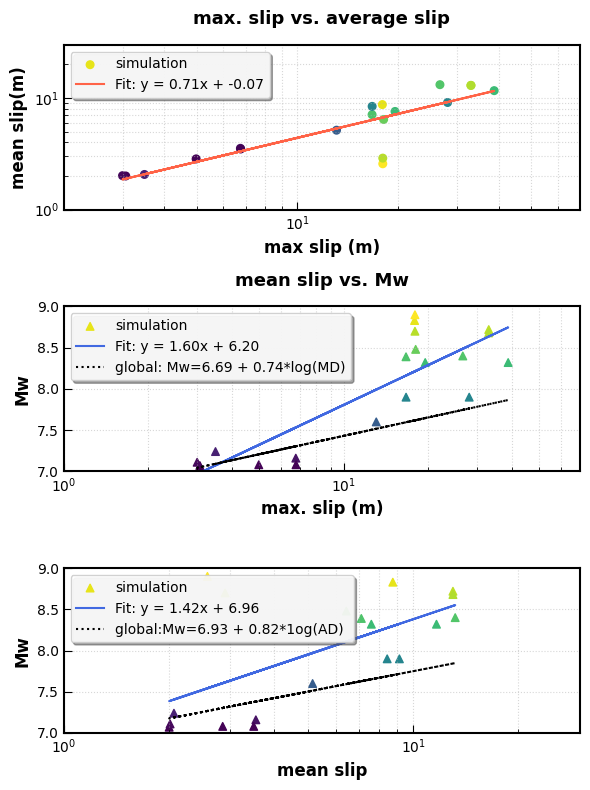

In [109]:
from scipy import stats

fig, ax1 = plt.subplots(3,1,figsize=(6,8))

ax1[0].scatter(u_max,u_avg,s=30,c=mw_models,marker='o',label='simulation')

ax1[1].scatter(u_max,mw_models,s=30,c=mw_models,marker='^',label='simulation')

im3 = ax1[2].scatter(u_avg,mw_models,s=30,c=mw_models,marker='^',label='simulation')

# Perform linear regression: y = mx + b
# coeffs = np.polyfit(np.log10(u_max),np.log10(u_avg), 1)  # 1 = linear (degree 1 polynomial)
# Perform regression
m,b, r_value, p_value, std_err = stats.linregress(np.log10(u_max),np.log10(u_avg))

ax1[0].set_xlabel('max slip (m)')
ax1[0].set_ylabel('mean slip(m)')
ax1[0].set_title('max. slip vs. average slip')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

# Create fitted line
y_fit = m * np.log10(u_max) + b
ax1[0].plot(u_max, 10**y_fit, '-', color='tomato',linewidth=1.5, label=f'Fit: y = {m:.2f}x + {b:.2f}')

ax1[1].set_ylabel('Mw')
ax1[1].set_xlabel('max. slip (m)')
ax1[1].set_title('mean slip vs. Mw')
ax1[1].set_xscale('log')


# Perform linear regression: y = mx + b
# coeffs = np.polyfit(np.array(mw_models),np.log10(u_max),1)  # 1 = linear (degree 1 polynomial)
m,b, r_value, p_value, std_err = stats.linregress(np.log10(u_max),np.array(mw_models))


# Create fitted line
y_fit = m * np.log10(u_max) + b
ax1[1].plot((u_max),y_fit, '-', color='royalblue',linewidth=1.5, label=f'Fit: y = {m:.2f}x + {b:.2f}')

# global average
ax1[1].plot(u_max,6.69 + 0.74*np.log10(u_max),color='k',linestyle=':',linewidth = 1.5,label='global: Mw=6.69 + 0.74*log(MD)')


ax1[0].set_ylim([1,30])
ax1[0].set_xlim([2,70])
ax1[1].set_xlim([1,70])
ax1[1].set_ylim([7,9])

ax1[1].legend(loc=2)
ax1[0].legend(loc=2)


# Perform linear regression: y = mx + b
# coeffs = np.polyfit(np.array(mw_models),np.log10(u_avg),1)  # 1 = linear (degree 1 polynomial)
m,b, r_value, p_value, std_err = stats.linregress(np.log10(u_avg),np.array(mw_models))

# Create fitted line
y_fit = m * np.log10(u_avg) + b
ax1[2].plot((u_avg), y_fit, '-', color='royalblue',linewidth=1.5, label=f'Fit: y = {m:.2f}x + {b:.2f}')

# global average
ax1[2].plot((u_avg),6.93 + 0.82*np.log10(u_avg),color='k',linestyle=':',linewidth = 1.5,label='global:Mw=6.93 + 0.82*1og(AD) ')

ax1[2].set_xlim([1,30])
ax1[2].set_ylim([7,9])
ax1[2].set_xscale('log')
ax1[2].legend(loc=2)
ax1[2].set_xlabel('mean slip')
ax1[2].set_ylabel('Mw')


# Single colorbar on the right
# cbar = fig.colorbar(im3, ax=ax1, shrink=0.9, pad=0.02)
# cbar.set_label('Mw', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('slip_scaling.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
from StatsModel.simple_spectral_decay import simple_spectral_decay

# Basic usage - analyzes first numeric column
decay_exp, r2 = simple_spectral_decay('your_data.csv')

# Specify column and sampling rate
decay_exp, r2 = simple_spectral_decay('data.csv', 
                                     column_name='acceleration',
                                     sampling_rate=100)

# Fit specific frequency range
decay_exp, r2 = simple_spectral_decay('data.csv',
                                     sampling_rate=50,
                                     freq_range=(1, 25))  # 1-25 Hz



6.456542290346556

### Test codes

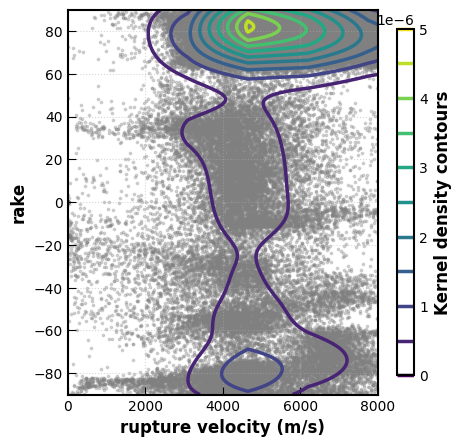

In [162]:
from scipy.stats import gaussian_kde
import numpy as np, matplotlib.pyplot as plt

# x = ssTable1["Vr"]
# y = ssTable1['rake']

# xy = np.vstack([x, y]); 
# kde = gaussian_kde(xy)
# xi, yi = np.mgrid[min(x):max(x):200j, min(y):max(y):200j]
# zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)

plt.figure(figsize=(5,5))

plt.scatter(x, y, s=3, alpha=0.3,color='gray')
axe=plt.contour(xi, yi, zi, levels=9,cmap='viridis'); 

clb = plt.colorbar(shrink=0.9)
clb.set_label('Kernel density contours')

plt.xlim([0,8000])
plt.xlabel('rupture velocity (m/s)')
plt.ylabel('rake')
plt.savefig('kde-'+modelname + '-vr-rake.png')
plt.show()


In [ ]:
import numpy as np

x = np.array([1.0, 2.0, 4.0, 5.0])
np.cov(x)                 # variance of x (unbiased, ddof=1)
print(x)

X = np.column_stack([x, np.array([2, 1, 0, 3])])

print(X
)

C = np.cov(X, rowvar=True)
print(C)

[1. 2. 4. 5.]
[[1. 2.]
 [2. 1.]
 [4. 0.]
 [5. 3.]]
[[ 0.5 -0.5 -2.  -1. ]
 [-0.5  0.5  2.   1. ]
 [-2.   2.   8.   4. ]
 [-1.   1.   4.   2. ]]


In [128]:
import numpy as np

# Example data with two variables
data = np.array([[1, 2, 3, 4, 5],
                 [5, 4, 3, 2, 1]])

# Calculate the covariance matrix
covariance_matrix = np.cov(data)
print(covariance_matrix)

[[ 2.5 -2.5]
 [-2.5  2.5]]
